# Stock Price Prediction Model

### Import Packages

In [0]:
# Install yfinance (Yahoo Finance market data downloader) 
!pip install yfinance

Collecting yfinance
 Downloading yfinance-0.1.87-py2.py3-none-any.whl (29 kB)
Requirement already satisfied: appdirs>=1.4.4 in /usr/local/lib/python3.8/dist-packages (from yfinance) (1.4.4)
Collecting multitasking>=0.0.7
 Downloading multitasking-0.0.11-py3-none-any.whl (8.5 kB)
Requirement already satisfied: pandas>=0.24.0 in /databricks/python3/lib/python3.8/site-packages (from yfinance) (1.2.4)
Requirement already satisfied: lxml>=4.5.1 in /databricks/python3/lib/python3.8/site-packages (from yfinance) (4.9.1)
Requirement already satisfied: numpy>=1.15 in /databricks/python3/lib/python3.8/site-packages (from yfinance) (1.19.2)
Collecting requests>=2.26
 Downloading requests-2.28.1-py3-none-any.whl (62 kB)
█████▏ | 10 kB 31.0 MB/s eta 0:00:01 |██████████▍ | 20 kB 19.0 MB/s eta 0:00:01 |███████████████▋ | 30 kB 24.8 MB/s eta 0:00:01 |████████████████████▉ | 40 kB 14.3 MB/s eta 0:00:01 |██████████████████████████ | 51 kB 13.5 MB/s eta 0:00:01 |███████████████████████████████▎| 61 kB 15.5 MB/s eta 0:00:01 |████████████████████████████████| 62 kB 1.6 MB/s 
Requirement already satisfied: pytz>=2017.3 in /databricks/python3/lib/python3.8/site-packages (from pandas>=0.24.0->yfinance) (2020.5)
Requirement already satisfied: python-dateutil>=2.7.3 in /databricks/python3/lib/python3.8/site-packages (from pandas>=0.24.0->yfinance) (2.8.1)
Requirement already satisfied: six>=1.5 in /databricks/python3/lib/python3.8/site-packages (from python-dateutil>=2.7.3->pandas>=0.24.0->yfinance) (1.15.0)
Requirement already satisfied: certifi>=2017.4.17 in /databricks/python3/lib/python3.8/site-packages (from requests>=2.26->yfinance) (2020.12.5)
Requirement already satisfied: urllib3<1.27,>=1.21.1 in /databricks/python3/lib/python3.8/site-packages (from requests>=2.26->yfinance) (1.25.11)
Collecting charset-normalizer<3,>=2
 Downloading charset_normalizer-2.1.1-py3-none-any.whl (39 kB)
Requirement already satisfied: idna<4,>=2.5 in /databricks/python3/lib/python3.8/site-packages (from requests>=2.26->yfinance) (2.10)
Installing collected packages: charset-normalizer, requests, multitasking, yfinance
 Attempting uninstall: requests
 Found existing installation: requests 2.25.1
 Uninstalling requests-2.25.1:
 Successfully uninstalled requests-2.25.1
Successfully installed charset-normalizer-2.1.1 multitasking-0.0.11 requests-2.28.1 yfinance-0.1.87
 WARNING: You are using pip version 21.0.1; however, version 22.3.1 is available.
You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.

In [0]:
# Import external packages
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm


### Observations - Extract Data from Yahoo Finance

[*********************100%***********************] 1 of 1 completed

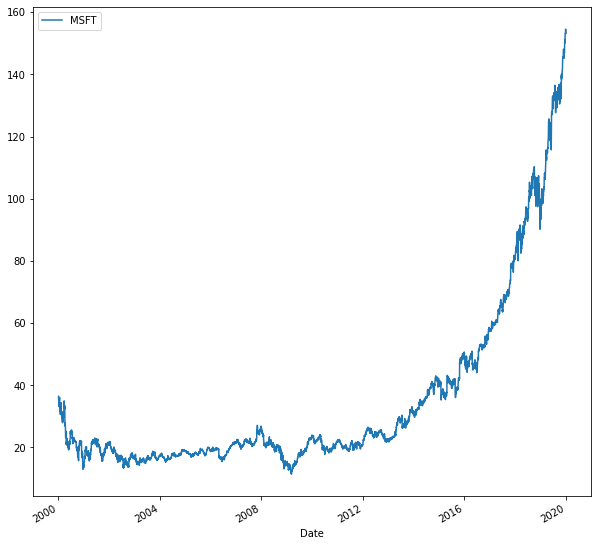

In [0]:
# Extract data from Yahoo Finance
ticker = 'MSFT'
stock_data = pd.DataFrame()
stock_data[ticker]= yf.download(ticker, start='2000-1-1', end = '2019-12-31')['Adj Close']

# Plot MSFT closing prices
stock_data.plot(figsize = (10, 10));

### Distributions - Calculate Historical Returns and Statistical Measures

Out[4]:

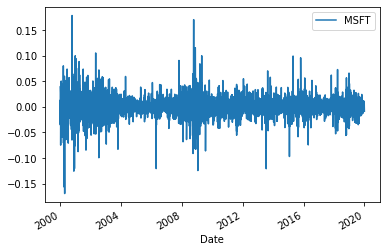

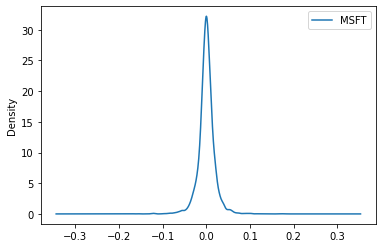

<AxesSubplot:ylabel='Density'>

In [0]:
# Calculate historical log returns
log_return = np.log(1 + stock_data.pct_change())

# Show all the log returns
log_return .plot()

# Show the distribution of the log returns
log_return.plot.density()

In [0]:
# Calculate key statistic measures
mean = log_return.mean()
variance = log_return.var()
STD = log_return.std()
print("Mean: {},Variance: {}, Standard Deviation : {}".format(mean, variance, STD))

Mean: MSFT 0.000285
dtype: float64,Variance: MSFT 0.00036
dtype: float64, Standard Deviation : MSFT 0.018982
dtype: float64

### Simulations - Simulate Future Daily Returns and Future Prices

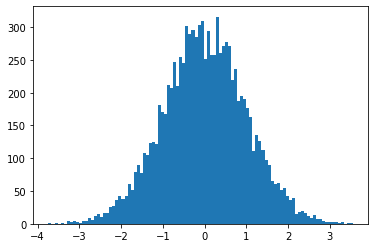

In [0]:
# How to generate 10,000 random numbers betwen 0 and 1.
random_numbers = np.random.rand(10000)
# Use those randomly generated numbers to sample from a normal distribution
normal_random_numbers = norm.ppf(random_numbers)

# Plot each of the 10,000 randombly generated numbers from the normal distribution
plt.hist(normal_random_numbers, bins = 100)
plt.show()

In [0]:
# Simulate future daily returns using the above method
t_intervals = 250
simulations = 10000

daily_logreturns_simulated = STD.values * norm.ppf(np.random.rand(t_intervals,simulations))
daily_simplereturns_simulated = np.exp(daily_logreturns_simulated)
daily_logreturns_simulated.shape

Out[25]: (250, 10000)

In [0]:
# Using returns, calculate future price progression in each simulation


# Latest known stock price for MSFT
last_price = stock_data.iloc[-1]
# Prepare an array for the price simulations
price_list = np.zeros_like(daily_simplereturns_simulated)


# Set the first row to the starting stock price
price_list[0] = last_price
price_list


Out[26]: array([[153.20622253, 153.20622253, 153.20622253, ..., 153.20622253,
 153.20622253, 153.20622253],
 [ 0. , 0. , 0. , ..., 0. ,
 0. , 0. ],
 [ 0. , 0. , 0. , ..., 0. ,
 0. , 0. ],
 ...,
 [ 0. , 0. , 0. , ..., 0. ,
 0. , 0. ],
 [ 0. , 0. , 0. , ..., 0. ,
 0. , 0. ],
 [ 0. , 0. , 0. , ..., 0. ,
 0. , 0. ]])

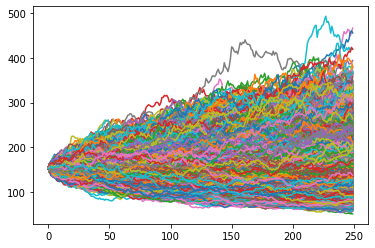

In [0]:
# Apply a for loop for simulated prices
for t in range(1, t_intervals):
  price_list[t] = price_list[t-1] * daily_simplereturns_simulated[t]
  

# Plot simulated future MSFT prices
plt.plot(price_list)
plt.show()

### Including Drift

In [0]:
# Calculate drift
drift = mean -(0.5 *variance)

# Simulate future daily returns
t_intervals = 250
simulations = 10000

daily_logreturns_simulated= STD.values * norm.ppf(np.random.rand(t_intervals, simulations))
daily_logreturns_simulated_with_drift = daily_logreturns_simulated + drift.values
daily_simplereturns_simulatedwith_drift = np.exp(daily_logreturns_simulated_with_drift)


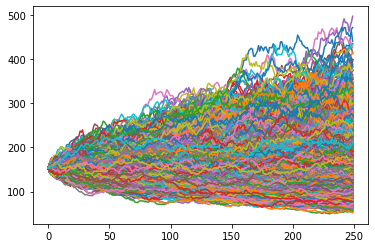

In [0]:
# Create a variable for the latest price of MSFT
last_price = stock_data.iloc[-1]

# Prepare an array for the price simulations
price_list = np.zeros_like(daily_simplereturns_simulatedwith_drift)

# Set the first row to the starting stock price
price_list[0] = last_price


# Apply a for loop for simulated prices
for t in range(1, t_intervals):
  price_list[t] = price_list[t -1] * daily_simplereturns_simulatedwith_drift[t]

# Plot simulated future MSFT prices
plt.plot(price_list)
plt.show()


### Quantifications - Examine the worst, average, best scenarios and the probability distribution

In [0]:
# Calculate worst, avg and best scenarios

worstsim = round(price_list[-1].min(),2)
AVgsim = round(price_list[-1].mean(),2)
bestsim = round(price_list[-1].max(),2)
# Examine the worst, average, and best stock price 
print("Best simulation ${}".format(bestsim))
print("Avg simulation ${}".format(AVgsim))
print("worst simulation ${}".format(worstsim))

# Set up confidence intervals
Mean_Day250 = price_list[-1].mean()
SD_Day250 = price_list[-1].std()
UpperInterval_1STD = Mean_Day250 +1 * SD_Day250
lowerInterval_1STD = Mean_Day250 - 1 * SD_Day250
UpperInterval_2STD = Mean_Day250 + 2 * SD_Day250
lowerInterval_2STD = Mean_Day250 - 2 * SD_Day250



# Print out the price range within the confidence intervals
print('\n  + Confidence Interval')
print('1 sigma 68% the price will fall between ${} and ${}'.format(UpperInterval_1STD, lowerInterval_1STD))
print('2 sigma 68% the price will fall between ${} and ${}'.format(UpperInterval_2STD, lowerInterval_2STD))


Best simulation $496.45
Avg simulation $164.16
worst simulation $52.01

 + Confidence Interval
1 sigma 68% the price will fall between $214.26401314108085 and $114.05310623803682
2 sigma 68% the price will fall between $264.36946659260286 and $63.947652786514794